In [1]:
import pandas as pd

df = pd.read_csv('Medical_Insurance_dataset.csv')

In [2]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
df.loc[df['sex']=='male','sex']=0
df.loc[df['sex']=='female','sex']=1
df['sex']=df['sex'].astype('int32')

In [4]:
df.loc[df['smoker']=='no','smoker']=0
df.loc[df['smoker']=='yes','smoker']=1
df['smoker']=df['smoker'].astype('int32')

In [5]:
df = pd.get_dummies(df)

In [6]:
df.head()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,21.000000,0,25.745000,0,2,3279.868550,1,0,0,0
1,36.976978,1,25.744165,1,3,21454.494239,0,0,1,0
2,18.000000,0,30.030000,0,1,1720.353700,0,0,1,0
3,37.000000,0,30.676891,0,3,6801.437542,1,0,0,0
4,58.000000,0,32.010000,0,1,11946.625900,0,0,1,0


In [7]:
df.describe()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,0.441047,30.629652,0.154270,2.503581,12784.808644,0.233609,0.250964,0.281267,0.234160
std,12.151029,0.496581,5.441307,0.361257,1.712568,10746.166743,0.423184,0.433628,0.449680,0.423531
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,26.694526,0.000000,1.000000,5654.818262,0.000000,0.000000,0.000000,0.000000
50%,39.170922,0.000000,30.200000,0.000000,3.000000,9443.807222,0.000000,0.000000,0.000000,0.000000
75%,48.343281,1.000000,34.100000,0.000000,4.000000,14680.407505,0.000000,1.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,1.000000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [8]:
feature = df[df.keys().drop('charges')].values
outcome = df['charges'].values

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
feature_poly = poly.fit_transform(feature)

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(feature, outcome, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(train_input, train_target)

ElasticNet()

In [12]:
y_pred = elasticnet.predict(test_input)

In [13]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE :",mean_absolute_error(test_target, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(test_target, y_pred)))

MAE : 6553.591880977993
RMSE : 8904.228761924698


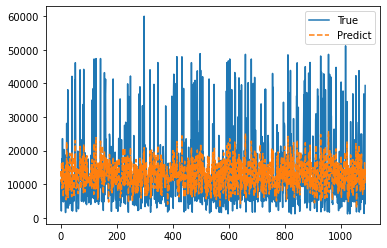

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(test_target, linestyle='-',label='True')
plt.plot(y_pred, linestyle='--', label='Predict')
plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(feature_poly, outcome, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(train_input, train_target)

/home/minsuchae/.pyenv/versions/3.9.0/envs/tensorflow_gpu_2.7.0/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.846e+10, tolerance: 2.878e+07
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [17]:
y_pred = elasticnet.predict(test_input)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE :",mean_absolute_error(test_target, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(test_target, y_pred)))

MAE : 2952.794682978666
RMSE : 4992.398080641136


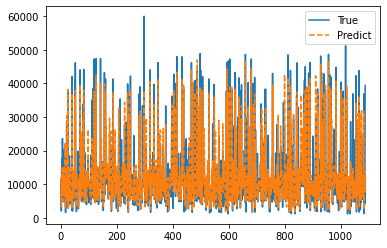

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(test_target, linestyle='-',label='True')
plt.plot(y_pred, linestyle='--', label='Predict')
plt.legend()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(feature, outcome, test_size=0.3, random_state=42)

In [21]:
from sklearn.linear_model import ElasticNetCV

elasticnetcv = ElasticNetCV(alphas=np.arange(0.01,10.01,0.01), cv=5)
elasticnetcv.fit(train_input, train_target)

ElasticNetCV(alphas=array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66...
        9.28,  9.29,  9.3 ,  9.31,  9.32,  9.33,  9.34,  9.35,  9.36,
        9.37,  9.38,  9.39,  9.4 ,  9.41,  9.42,  9.43,  9.44,  9.45,
        9.46,  9.47,  9.48,  9.49,  9.5 ,  9.51,  9.52,  9.53,  9.54,
        9.55,  9.56,  9.57,  9.58,  9.59,  9.6 ,  9.61,  9.62,  9.63,
        9.64,  9.65,  9.66,  9.67,  9.68,  9.69,  9.7 ,  9.71,  9.72,
        9.73,  9.74,  9.75,  9.76,  9.77,  9.78,  9.79,  9.8 ,  9.81,
        9.82,  9.83,  9.84,  9.85,  9.86

In [22]:
print(elasticnetcv.alpha_)

0.01


In [23]:
y_pred = elasticnetcv.predict(test_input)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE :",mean_absolute_error(test_target, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(test_target, y_pred)))

MAE : 3911.4207944548025
RMSE : 5839.560155249173


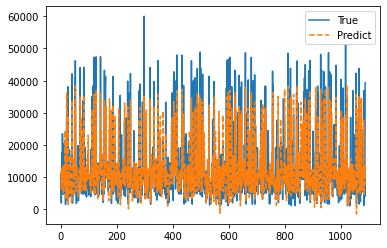

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(test_target, linestyle='-',label='True')
plt.plot(y_pred, linestyle='--', label='Predict')
plt.legend()
plt.show()